<a href="https://colab.research.google.com/github/meichen1/DL-with-Python-and-PyTorch/blob/master/Time_Series_Forecasting_LSTM_in_Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'sandp500:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1908%2F17155%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240213%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240213T043753Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D272dedd188e182c8957c9774851b4c6657607aeef380275024a3529973b1082234e09c6fad8086ffe5f85c62ab6e43c538130841c239e2b539b2366f4604b4fbd3d69b1faf7c3e23a1ecfb82c518aa0303f48f3e5b1417ee02e475a043e44260f84120b4309c4a571bb86659b97ddf558bfb91e216725848453b12a4b1e35b5a57a06597b905ab01c7cb3e7a203c88bed8a84c7094fbe88c9c0079abda55e8496bb14a6108f9e9d6c4065ef98f030895fbddb54d9542de9c5a4ebf6279459331628076d4d2f5687d0f1e493b5be7fa8bf893d73304833f4912eb626cb266a6197d4773ddd58fe66a559a9a05b59e54580bf124795a79fb495b02b6bc2d99a95e,amzn-dpz-btc-ntfx-adjusted-may-2013may2019:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F195545%2F433077%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240213%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240213T043753Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da09569c621d87a0e43eaacee19db5fb7a81c345bae94a912652bc63d04d017e2a3d4b1a2506f7b11b6cf2b105bbd793dec7bba016afebfbe11574d52a0c791c50478ac15f59889f51c652b008a5a73e67ba206de6c6bebf240fe5211bd2f653f861ed18962a4c298875ae3ddd27547f433169db82004ae56d1d9c0e51a55e12cd990389eae975b57502e721d986cdd4b2b2aac1cd8a2b558b01b09d9c0adfef3012db3cf03f9477605c5892ad4c4988f34a8a21b04bd57a25a6aea76196badeac8cd953393583511320780e5c77345b37159c588a5a71d704102221c318b6bd8ea520a78c43e3e44b12986e374aac567fe04c5314aa5d4c935282787b1014df0,apple-aapl-historical-stock-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F533900%2F976925%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240213%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240213T043753Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da9cfe9cfa10b750df837d0df486b1ccbc877446113409e563c938d410daec915e78f674463eec88eaba424ef66dc9bdc3066f147a6ae77b61310ac31470bd5734e872d7096e8ab1e179c8c4fbcc129d88eba930004fa1395dba129d367cbb60802115d148dfe900ef6a9c5580ebcb7db43e6fc554870188d6dda3eb357d17074bbd5488dd517f0a27570cceb94d694779d32259b235939ea934b6d464cd093fe8e47f9d36e445f9f6fac8cf1bdd2a98b2f72960395e73114078c9b632cce402e756d01221a5305459e4e1a41276b171db9dd878a71f67dffb77085800c1694792e096eec778ffa7f5d85e8836dc127fcf82f31f2eca60bb57c44df9193aedfa5,tesla-stock-price:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2076127%2F7417167%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240213%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240213T043753Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4ad39187d8fbc698837290506a8dc8cd22d282691c8520a0e28880745b5fe0034e27068aa98a5053caa5c7bebb0b291b25cfab7c6b9923627c66b9c702e9bb38b227b059b1da4df9b3d59562ed2251f8793f5ad729e3250d4dc49c573bf745ac500b3e9e5455d30dce9ff718909a81ef1af9bbf97d31fbbc1efd258047e1d50e45a7eea57bf8cfa14ae19369a63b3df8720479d87d7c99b303e2546844f49421540aeda151f200f84b4d114f82d41247c1f1fb2f263b31fb17c384dc6c6a4a65675035967db59e4a97e8ebca7a5d81efd5a83e774dd7462145be52fc0bbf71ce0be576a097757d8c9024bc8f91a065448f25ca4358e379ddb9fc4942b32ed8f6'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 20283917 bytes downloaded
Downloaded and uncompressed: sandp500
[==================================================] 30437 bytes downloaded
Downloaded and uncompressed: amzn-dpz-btc-ntfx-adjusted-may-2013may2019
[==================================================] 50651 bytes downloaded
Downloaded and uncompressed: apple-aapl-historical-stock-data
[==================================================] 81522 bytes downloaded
Downloaded and uncompressed: tesla-stock-price
Data source import complete.



<center><h1>Time Series Forecasting: LSTM in Stock Market Analysis</h1></center>

<p>&nbsp;</p>

# Introduction

<p>&nbsp;</p>

* The stock market is a platform for trading shares, indicating economic health. Stock prices offer a combination of long-term potential gains and risk, as they are based on supply and demand. Artificial intelligence is becoming increasingly widespread in stock price prediction through efficient time series analysis, especially with Long Short-Term Memory (LSTM) networks.
<p>&nbsp;</p>

### 🟢 Aim:
* I have designed thia notebook to offer a comprehensive analysis of stock market data. From data collection and preprocessing to employing machine learning models like LSTM, my aim is to provide insights into market trends and behaviors. The analysis covers descriptive statistics, time series visualization, and technical analysis along with performance metrics. The outcomes include performance metrics and interactive visualizations for a comprehensive understanding.

<p>&nbsp;</p>

<p><center style="color:#008000; ">
I've gained valuable insights and knowledge while working on this notebook, and I hope you find it helpful and enjoyable.</center></p>

***

# Import necessary libraries

📌 We get our data from **Yahoo Finance** . We have simple access to stock market data thanks to the excellent and useful **yfinance library**. Stocks data are available since 1970, allowing us  comprehensive historical information for our analysis.
<p>&nbsp;</p>

> *For this analysis, we will focus on technology stocks and innovative growth stocks.*


In [2]:
!pip install yfinance

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from datetime import datetime, timedelta
import math

import yfinance as yf

yf.pdr_override()

# For this analysis, we will focus on technology stocks and innovative growth stocks
stocks_list = ['AAPL', 'GOOG', 'TSLA', 'NVDA']

end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

for stock in stocks_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, TSLA, NVDA]
company_name = ["APPLE", "GOOGLE", "TESLA", "NVIDA"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-01-30,629.000000,634.929993,622.599976,627.739990,627.739990,41073500,NVIDA
2024-01-31,614.400024,622.690002,607.000000,615.270020,615.270020,45379500,NVIDA
2024-02-01,621.000000,631.909973,616.500000,630.270020,630.270020,36914600,NVIDA
2024-02-02,639.739990,666.000000,636.900024,661.599976,661.599976,47578000,NVIDA
2024-02-05,682.250000,694.969971,672.049988,693.320007,693.320007,68007800,NVIDA
2024-02-06,696.299988,697.539978,663.000000,682.229980,682.229980,68311100,NVIDA
2024-02-07,683.190002,702.200012,676.000000,700.989990,700.989990,49557500,NVIDA
2024-02-08,700.739990,707.940002,694.549988,696.409973,696.409973,41442200,NVIDA
2024-02-09,705.330017,721.849976,702.119995,721.330017,721.330017,43535300,NVIDA


# Data Exploration

🚀 Let's start by getting to know our stock data better. This section helps us understand the summary statistics, dataset structure, and variable types, laying the groundwork for deeper insights. It's similar to taking a quick look at a map before delving into the details of our analysis.

In [4]:
# Summary statistics
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,501.000000,501.000000,501.000000,501.000000,501.000000,5.010000e+02
mean,164.449282,166.277006,162.809202,164.650659,163.681451,7.116651e+07
std,18.517259,18.202367,18.756517,18.492998,18.751145,2.438894e+07
min,126.010002,127.769997,124.169998,125.019997,124.166634,2.404830e+07
25%,148.869995,150.919998,147.240005,149.350006,148.119385,5.302030e+07
50%,165.000000,166.600006,163.729996,165.330002,164.143860,6.667540e+07
75%,178.880005,180.240005,177.339996,178.990005,178.505096,8.347440e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.826020e+08


In [5]:
# First 5 rows
AAPL.head(5)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-02-14,167.369995,169.580002,166.559998,168.880005,166.971893,86185500,APPLE
2022-02-15,170.970001,172.949997,170.250000,172.789993,170.837692,62527400,APPLE
2022-02-16,171.850006,173.339996,170.050003,172.550003,170.600433,61177400,APPLE
2022-02-17,171.029999,171.910004,168.470001,168.880005,166.971893,69589300,APPLE
2022-02-18,169.820007,170.539993,166.190002,167.300003,165.409744,82772700,APPLE


In [6]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 2022-02-14 to 2024-02-12
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          501 non-null    float64
 1   High          501 non-null    float64
 2   Low           501 non-null    float64
 3   Close         501 non-null    float64
 4   Adj Close     501 non-null    float64
 5   Volume        501 non-null    int64  
 6   company_name  501 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 31.3+ KB


In [7]:
df.isna().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64

# Time Series Visualization

**What Is Time Series Data ?**

<p>&nbsp;</p>
A time series data is a series of data points listed in consecutive time order or we can say time series data is a sequence of successive equal interval points in time. A time-series analysis consists of methods for analyzing time-series data in order to extract meaningful insights and other valuable characteristics of data.
<p>&nbsp;</p>
Time-series data analysis is becoming very important in so many industries like financial industries, pharmaceuticals, social media companies, web service providers, research, and many more. To understand the time-series data , Visualization of the data is essential. In fact, any type of data analysis is not complete without visualizations. Because one good visualization can provide meaningful and interesting insights into data.

<p>&nbsp;</p>

**Trend In The Dataset**

>We can see the change in trend in our dataset, Trend helps us see where the value of data that we are considering is going upward or downward in the long run.

<p>&nbsp;</p>

Source: [geeksforgeeks](https://www.geeksforgeeks.org/time-series-data-visualization-in-python/)

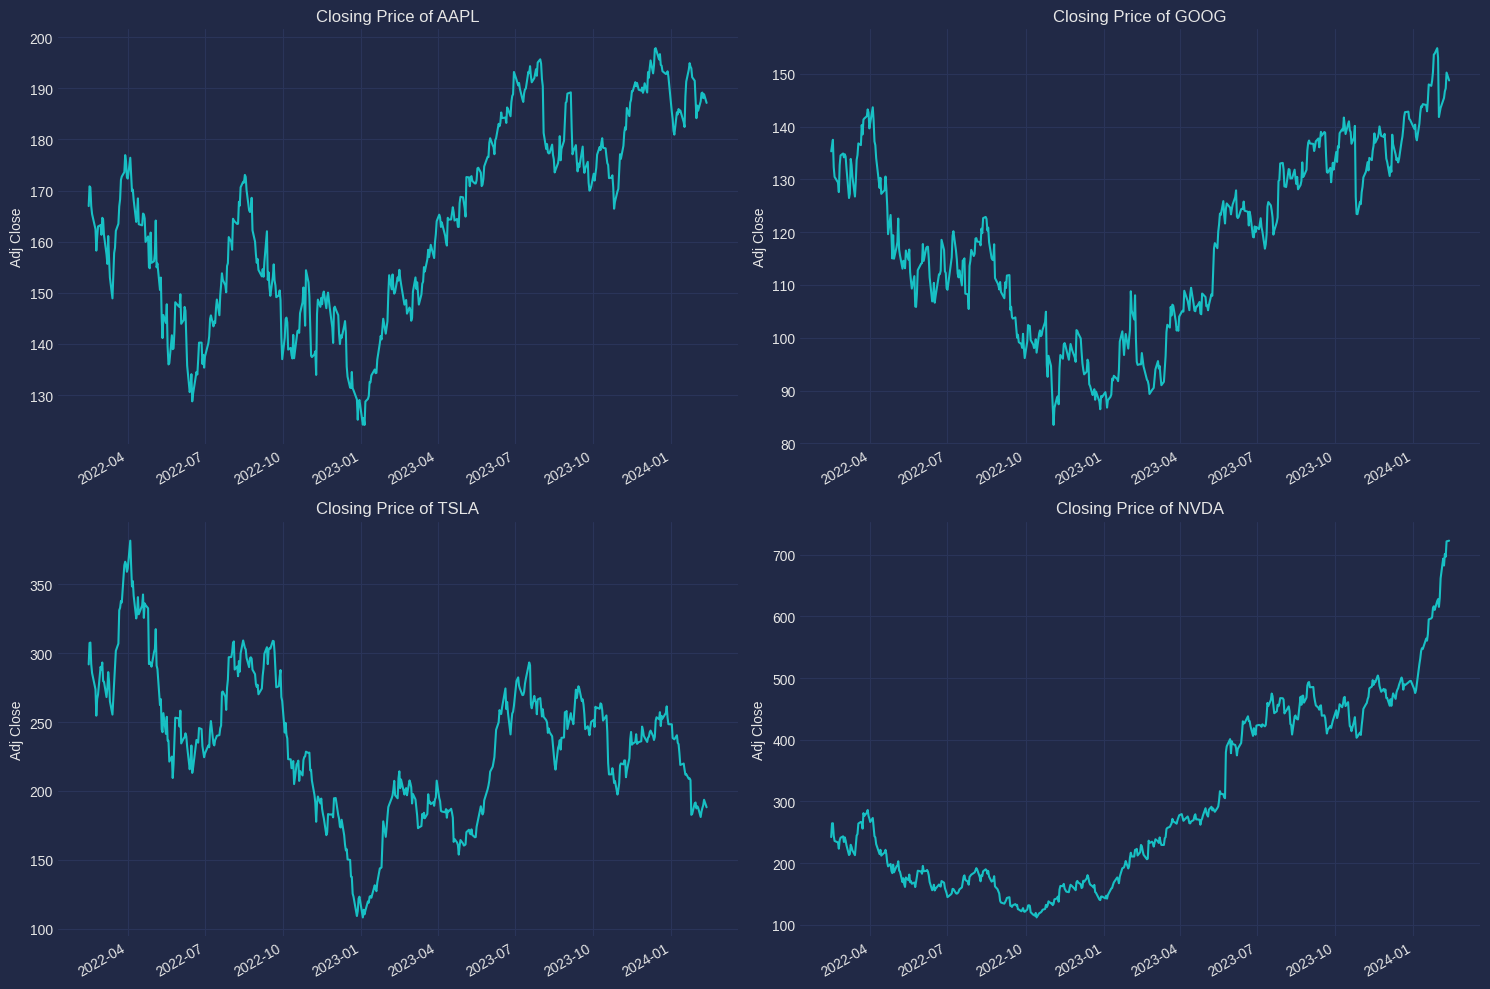

In [8]:
# Let's see a historical view of the closing price

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {stocks_list[i - 1]}")
    plt.grid(True)

plt.tight_layout() # Ensures proper spacing between subplots

**why weekly charts?** 🤔
>The choice between weekly and daily charts is determined by your trading style and goals. Weekly charts provide a more broad view of price trends, making them appropriate for long-term traders and institutiional analysts. Combining weekly and daily charts can confirm trends and signals while also providing a thorough analysis. Weekly charts suit less active traders looking for long-term trend changes or downtrend signals. Finally , the decision is based on your preferences and the level of detail required for successful trading.

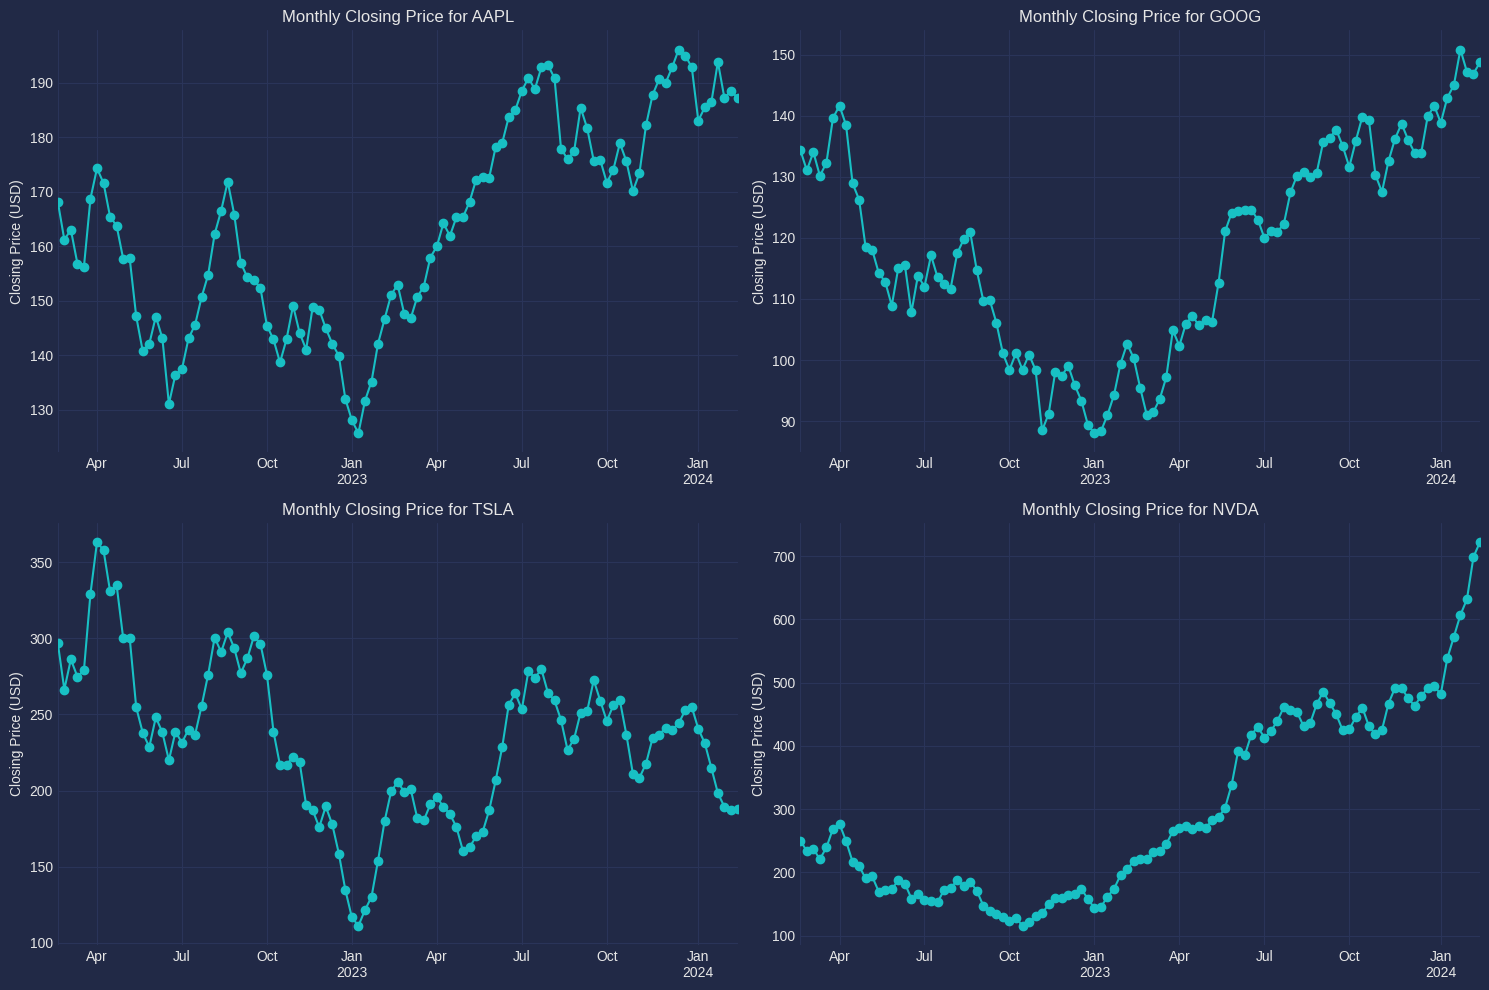

In [9]:
# Plotting the closing price for each week

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    weekly_data = company['Adj Close'].resample('W').mean() # Resample the data to get weekly averages
    weekly_data.plot(marker='o', linestyle='-')
    plt.title(f'Monthly Closing Price for {stocks_list[i - 1]}')
    plt.xlabel(None)
    plt.ylabel('Closing Price (USD)')
    plt.grid(True)

plt.tight_layout()

# Candlestick Charts

Candlestick graphs/charts provide a visual representation of price fluctuations, aiding traders in pattern identification and predicting short-term price trends. Each candle, representing a time period, consists of a body, upper shadow, and lower shadow.

<img src="https://wp-asset.groww.in/wp-content/uploads/2020/10/17103706/candle.jpg">



The body, colored red or green, indicates the opening and closing prices during the specified period. Understanding the body's color helps traders discern rising or falling stock prices. The candle also has four data points: Open, High, Low, Close (OHLC).

1. **Open:** The opening price at the beginning of the time period represented by the candle.

2. **High:** The highest price reached during the specified time period.

3. **Low:** The lowest price observed during the same time frame.

4. **Close:** The closing price at the end of the time period.

<img src="https://wp-asset.groww.in/wp-content/uploads/2020/10/17115223/can.jpg">


Analyzing a candlestick chart involves interpreting the body size, color, and the presence of wicks or shadows above and below. Short upper wicks on red candles suggest a near-high opening, while short upper wicks on green candles indicate a near-high closing.
<p>&nbsp;</p>

> *Utilizing this information, traders can grasp the market sentiment toward a stock. For further insights, refer to [groww](https://groww.in/blog/how-to-read-candlestick-charts).*

In [10]:
# Plotting Candlestick chart for Apple stock price

fig = go.Figure(data=[go.Candlestick(x=AAPL.index,
                open=AAPL['Open'],
                high=AAPL['High'],
                low=AAPL['Low'],
                close=AAPL['Close'])])

fig.update_layout(title='Apple Stock Price Candlestick Chart',
                  xaxis_title='Date',
                  yaxis_title='Stock Price (USD)')

fig.update_layout(template='plotly_dark')

fig.show()

# Technical Analysis and Performance Metric

# Moving Averages

**What Is a Moving Average (MA)?**
>In finance, a moving average (MA) is a widely used stock indicator in technical analysis, aimed at smoothing out price data by calculating a constantly updated average. The choice of the moving average period determines the level of lag , with longer periods having greater lag. Investors and traders often follow the 50-day and 200-day moving averages as significant trading signals.

**Why Use a Moving Average?**
>The primary purpose of a moving average is to reduce noise on a price chart and provide insights into the overall price direction. An upward angle indicates an overall upward price movement, while a downward angle suggests a downward trend. Additionally, moving averages can serve as support or resistance levels. In an uptrend, they may act as support, preventing prices from falling below. Conversely, in a downtrend, moving averages can act as resistance, limiting upward movements.



<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
    📌 Moving average lengths of 10, 20, 50, 100, and 200 are common. Depending on the trader's time horizon, these lengths can be applied to any chart time frame (one minute, daily, weekly, and so on).

</div>

<p>&nbsp;</p>

Source: [investopedia](https://www.investopedia.com/terms/m/movingaverage.asp)

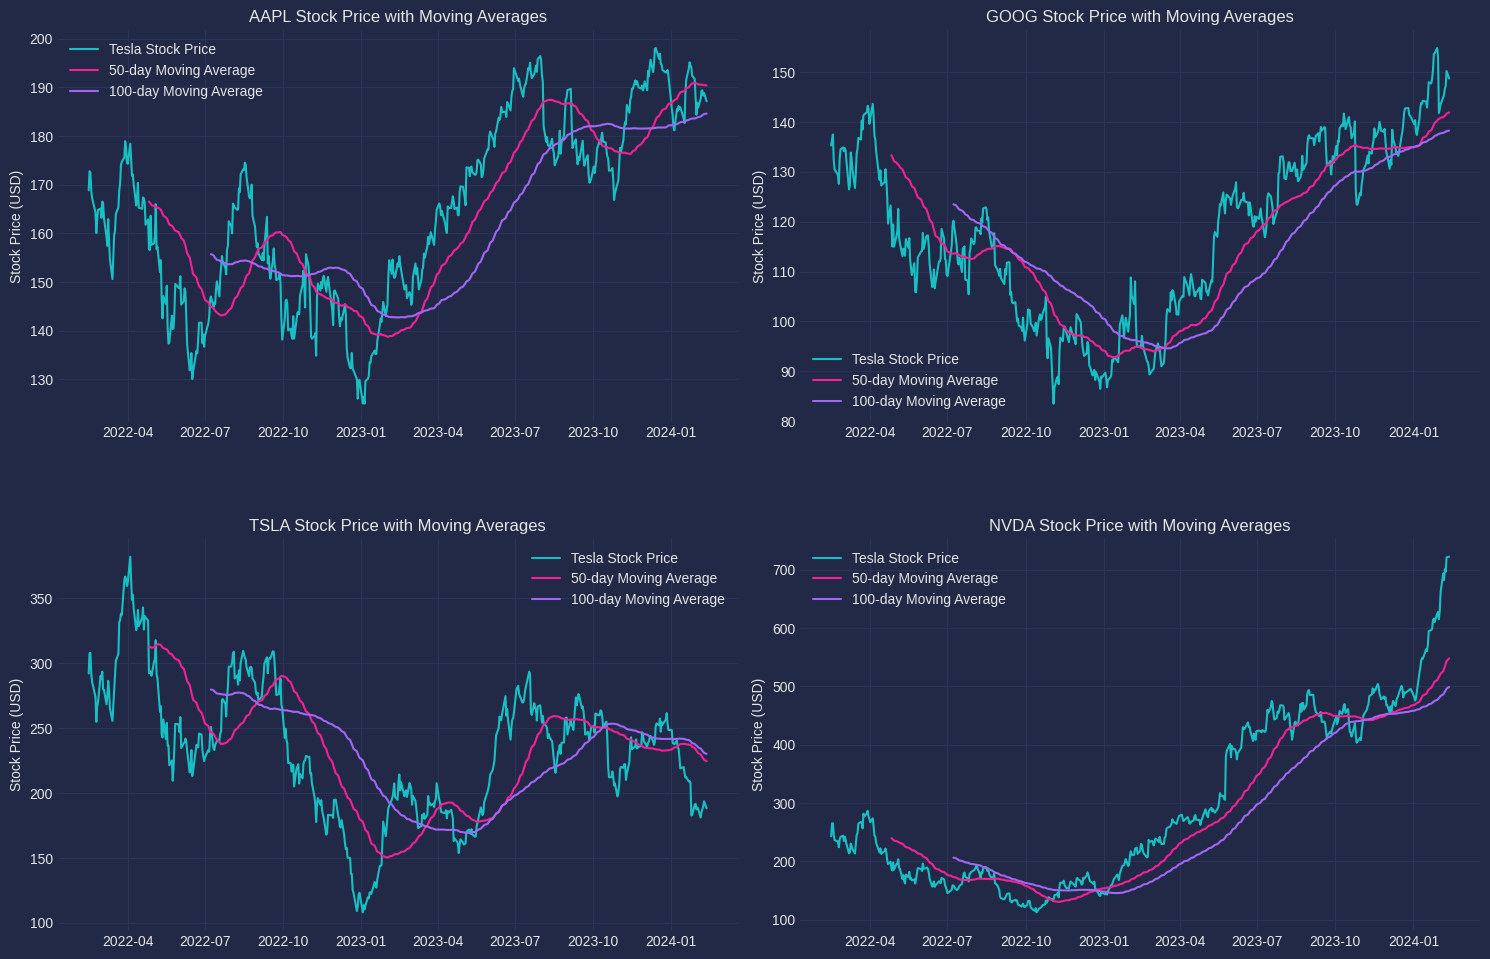

In [11]:
# calculating and plotting MA for each stock
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)

    company['MA50'] = company['Close'].rolling(window=50).mean()
    company['MA100'] = company['Close'].rolling(window=100).mean()

    plt.plot(company['Close'], label='Tesla Stock Price')
    plt.plot(company['MA50'], label='50-day Moving Average')
    plt.plot(company['MA100'], label='100-day Moving Average')
    plt.title(f'{stocks_list[i - 1]} Stock Price with Moving Averages')
    plt.xlabel(None)
    plt.ylabel('Stock Price (USD)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [12]:
import plotly.express as px

AAPL['MA50'] = AAPL['Close'].rolling(window=50).mean()
AAPL['MA200'] = AAPL['Close'].rolling(window=200).mean()

# Create a Plotly line plot for AAPL
fig = px.line(AAPL, x=NVDA.index, y=['Close', 'MA50', 'MA200'], title='AAPL Stock Price with Moving Averages')

fig.update_layout(template='plotly_dark')

fig.show()

# RSI (Relative Strength Index)

* The Relative Strength Index (RSI) is a momentum indicator used in technical analysis to determine whether a security is overvalued or undervalued based on recent price changes.
<p>&nbsp;</p>
* The RSI indicator helps traders in identifying bullish or bearish momentum signals.
<p>&nbsp;</p>
* It is shown as a line beneath the price graph of the asset, with readings above 70 indicating <span style="color:crimson;">overbought</span> conditions and readings below 30 indicating <span style="color:crimson;">oversold</span>  conditions.
<p>&nbsp;</p>
* RSI crossovers with these thresholds are often considered by traders as potential buy or sell signals. The RSI works more effectively in trading ranges than in trending markets.

<p>&nbsp;</p>

Source: [investopedia](https://www.investopedia.com/terms/r/rsi.asp)

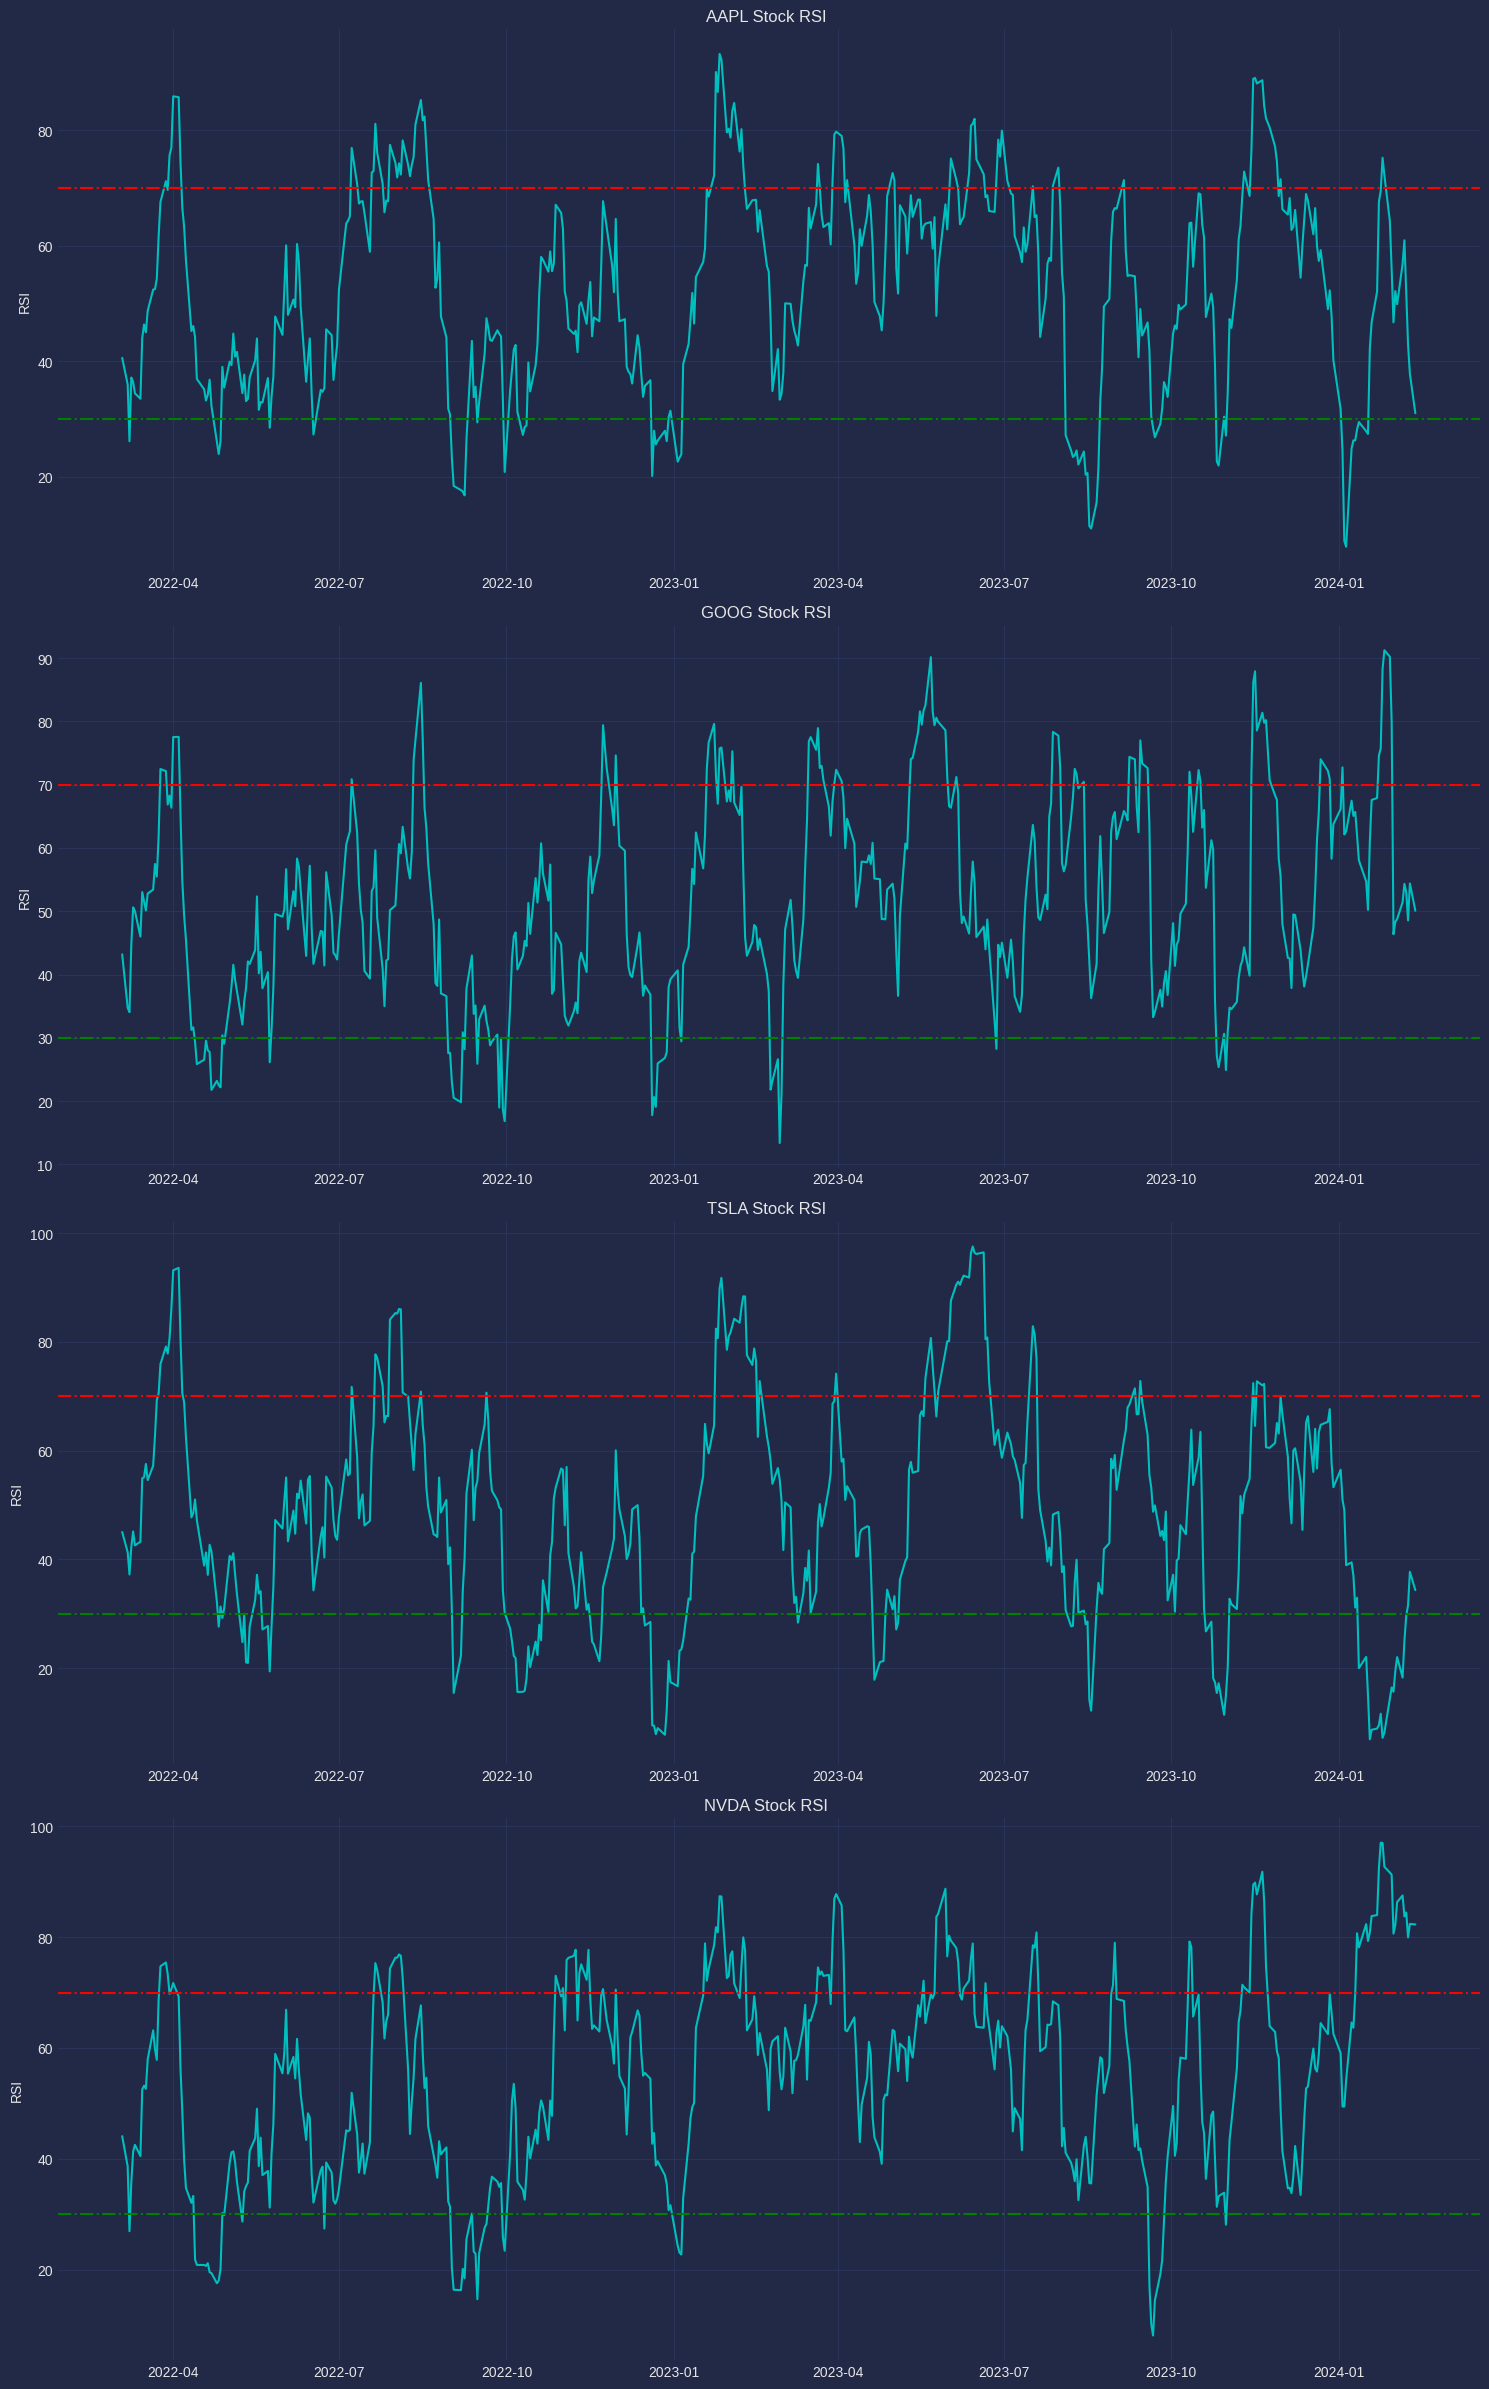

In [13]:
# calculating and plotting RSI for each stock

plt.figure(figsize=(15, 24))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(4, 1, i)

    # Calculate daily price change
    company['Daily Change'] = company['Close'].diff()

    # the lookback period for RSI
    period = 14    # a lookback period of 14 is a common choice for calculating the RSI

    # Calculate the average gain and average loss
    company['Gain'] = company['Daily Change'].apply(lambda x: x if x > 0 else 0)
    company['Loss'] = company['Daily Change'].apply(lambda x: -x if x< 0 else 0)
    company['Average Gain'] = company['Gain'].rolling(window=period).mean()
    company['Average Loss'] = company['Loss'].rolling(window=period).mean()

    # Calculate the relative strength  (RS)
    company['RS'] = company['Average Gain'] / company['Average Loss']

    # Calculate the RSI
    company['RSI'] = 100 - (100 / (1 + company['RS']))

    # Plotting the RSI
    plt.plot(company.index, company['RSI'], label=f'{stocks_list[i - 1]} RSI', color='c')
    plt.axhline(y=70, color='r', linestyle='dashdot')
    plt.axhline(y=30, color='g', linestyle='dashdot')
    plt.title(f'{stocks_list[i - 1]} Stock RSI ')
    plt.xlabel(None)
    plt.ylabel('RSI')

plt.tight_layout()
plt.show()


# Volatility Analysis

**What is Volatility and How is it Useful in Finance?📚**
<p>&nbsp;</p>
Volatility, which is a measure of price fluctuation, indicates how much a stock or market index can change. Higher volatility implies greater risk, as prices may experience significant swings. This uncertainty has an impact on option prices. on the other hand, lower volatility signals more stable prices.
<p>&nbsp;</p>
The percentage of daily returns measures asset variation, with historical volatility reflecting past price fluctuations expressed as a percentage over daily, weekly, monthly , or yearly time periods. It is calculated by multiplying the standard deviation by the square root of the number of time periods.
<p>&nbsp;</p>

vol = σ√T

where:

* v = volatility over some interval of time

* σ = standard deviation of returns

* T = number of periods in the time horizon

<p>&nbsp;</p>
While volatility is often associated with risk, they are not synonymous.Volatility measures the speed and magnitude of price movements, whereas risk refers to potential losses. The impact of volatility depends on your trading style and risk tolerance.  High volatility can be difficult for long-term investors, but it can also provide opportunities for day and options traders. High volatility suggests rapid and substantial price shifts.

> *This summary is based on my understanding, and for more in-depth insights, you can explore the details on [investopedia](https://www.investopedia.com/terms/v/volatility.asp#toc-example-of-volatility) .*



>📌 The code computes the percentage change in closing prices and then applies a rolling window to calculate the standard deviation. The window size of 20 indicates that it considers the last 20 periods to compute the standard deviation, providing a measure of short-term volatility.

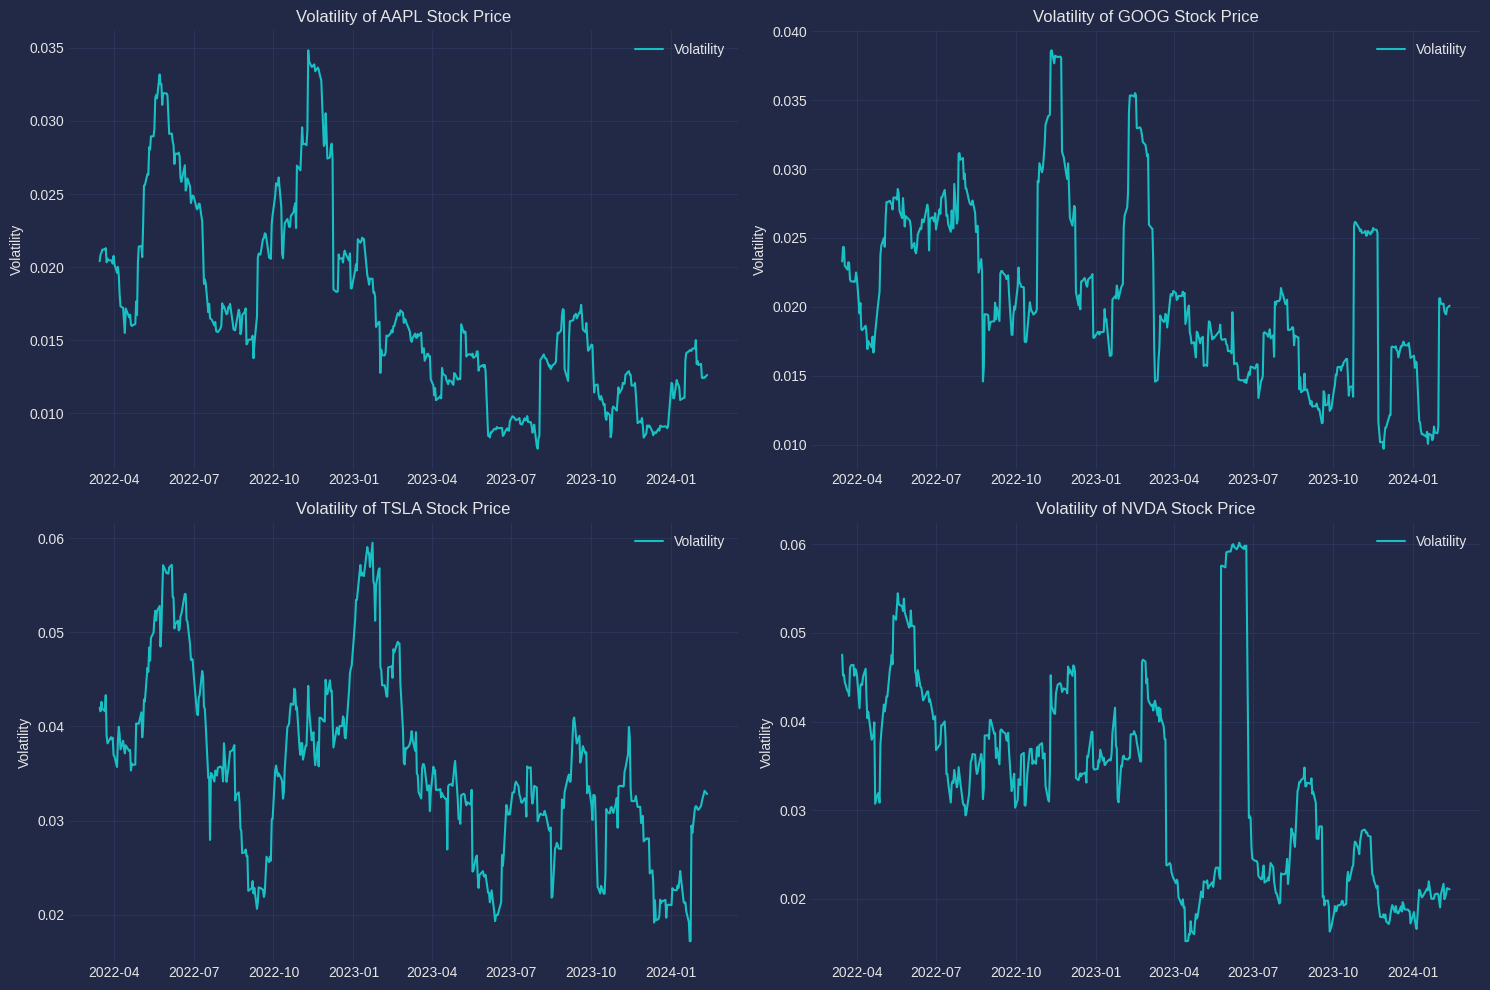

In [14]:
#  Plotting a short-term volatility chart for each stock

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volatility'] = company['Close'].pct_change().rolling(window=20).std()
    plt.plot(company['Volatility'], label='Volatility')
    plt.title(f'Volatility of {stocks_list[i - 1]} Stock Price')
    plt.xlabel(None)
    plt.ylabel('Volatility')
    plt.grid(True)
    plt.legend()


plt.tight_layout()
plt.show()

# Trading Volume Analysis

**Understanding Financial Market Volume Analysis**
<p>&nbsp;</p>
Volume analysis involves examining the number of shares or contracts traded for a specific security for a specific time period. Technical analysts use this analytical approach to make informed trading decisions by integrating volume trends with price movements.
<p>&nbsp;</p>
High trading volumes often convey valuable information about investors' sentiments regarding a market or security. For instance, a substantial price increase coupled with a significant uptick in volume might signal a sustained bullish trend or a bullish reversal. In contrast, a significant price decrease accompanied by increased volume can indicate a continuing bearish trend or a potential bearish reversal.

<p>&nbsp;</p>

Source: [investopedia](https://www.investopedia.com/terms/v/volume-analysis.asp)

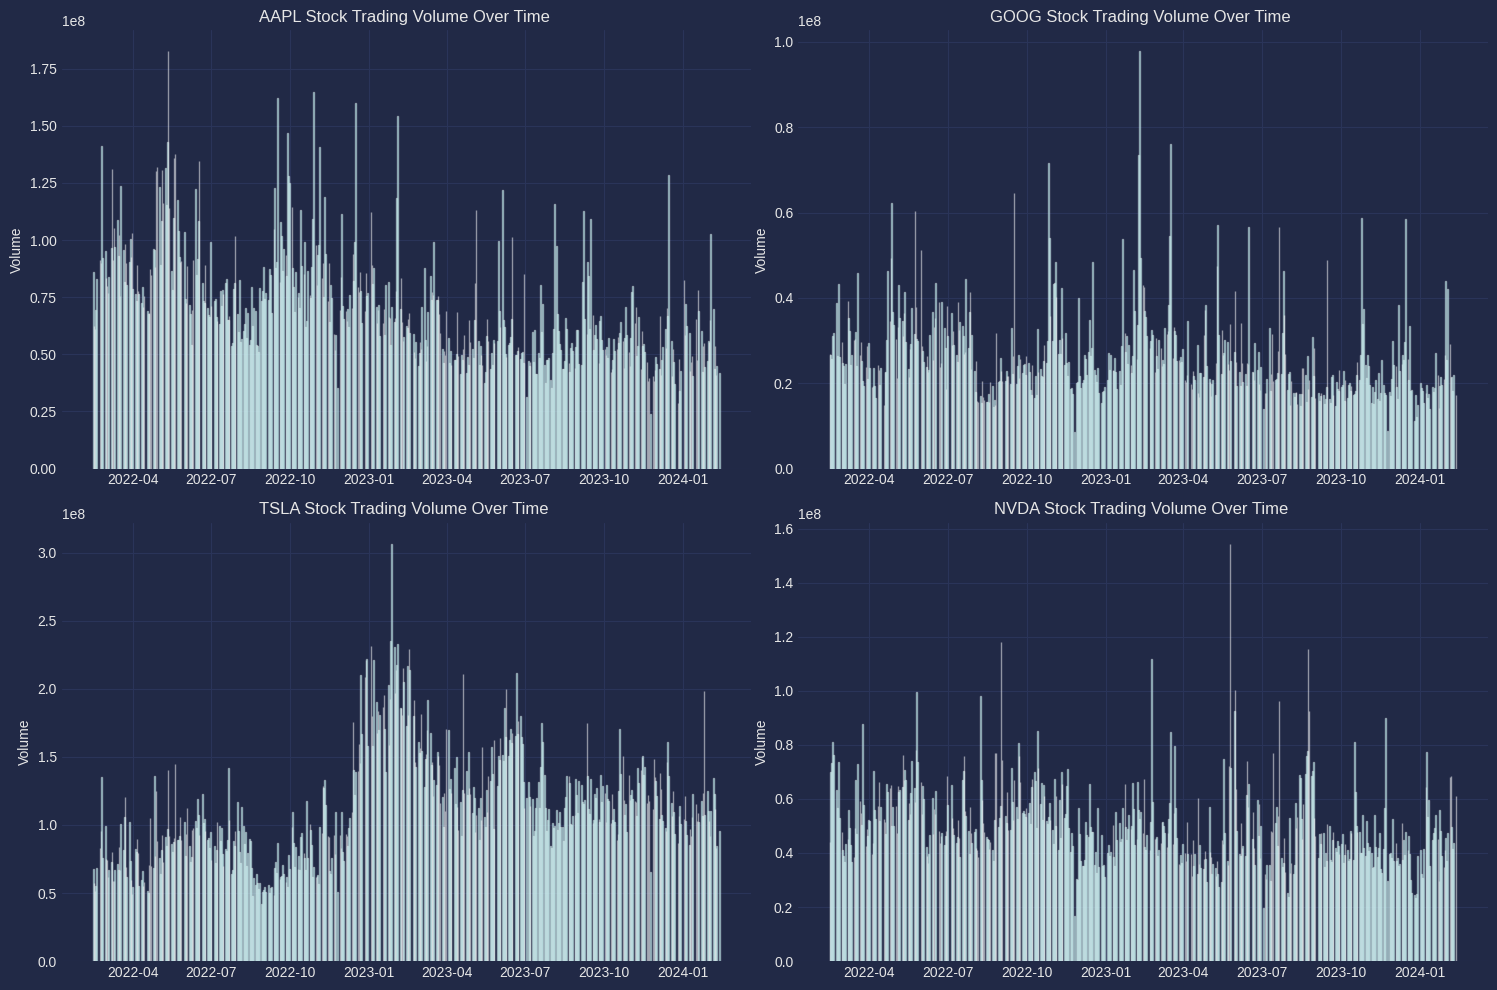

In [15]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    plt.bar(company.index, company['Volume'], color='c', alpha=0.5)
    plt.title(f'{stocks_list[i - 1]} Stock Trading Volume Over Time ')
    plt.xlabel(None)
    plt.ylabel('Volume')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Correlation Analysis (with S&P 500 as an example)

The Standard and Poor's 500, or simply the S&P 500, is a stock market index tracking the stock performance of 500 of the largest companies listed on stock exchanges in the United States. It is one of the most commonly followed equity indices.

<p>&nbsp;</p>

Source: [wikipedia](https://en.wikipedia.org/wiki/S%26P_500)

<p>&nbsp;</p>

**📑 Correlation Analysis:**
>  How close a stock's price movements align the overall market trend is indicated by the correlation between the S&P 500 and the stock.A positive correlation indicates that the stock moves in the same direction as the S&P 500, whereas a negative correlation indicates the opposite. Knowing this correlation can help you understand how much the overall state of the market influences a particular stock. If a stock has a high positive correlation with the S&P 500, it may be more sensitive to overall market trends.


In [16]:
# Download S&P 500 data
sp500_data = yf.download('^GSPC', start=start, end=end)

# Create a DataFrame to store correlation values
correlation_data = []

for i, company in enumerate(company_list, 1):
    correlation = company['Close'].corr(sp500_data['Close'])
    correlation_data.append({'Company': stocks_list[i - 1], 'Correlation': correlation})
    print(f"'Company : {stocks_list[i - 1]} Correlation: {correlation}")


[*********************100%%**********************]  1 of 1 completed

'Company : AAPL Correlation: 0.8829015332839207
'Company : GOOG Correlation: 0.8650700773388397
'Company : TSLA Correlation: 0.3102591545394223
'Company : NVDA Correlation: 0.8708426788114002


>📌 According to the correlation values, AAPL, GOOG and NVDA (correlations of 0.89, 0.86 and 0.83, respectively) have a very strong positive correlation with the S&P 500.  As a result, the stock movements of these companies closely align with overall market trends. On the other hand, TSLA (with correlations of 0.41) show a moderate positive correlation with the S&P 500. While this company is positively correlated, its stock movements may not be as closely aligned with the market as AAPL, GOOG and  NVDA

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
    A heatmap, which is a visual representation of a matrix using colors, serves several functions. It is primarily used to visualize correlations within a dataset.
</div>


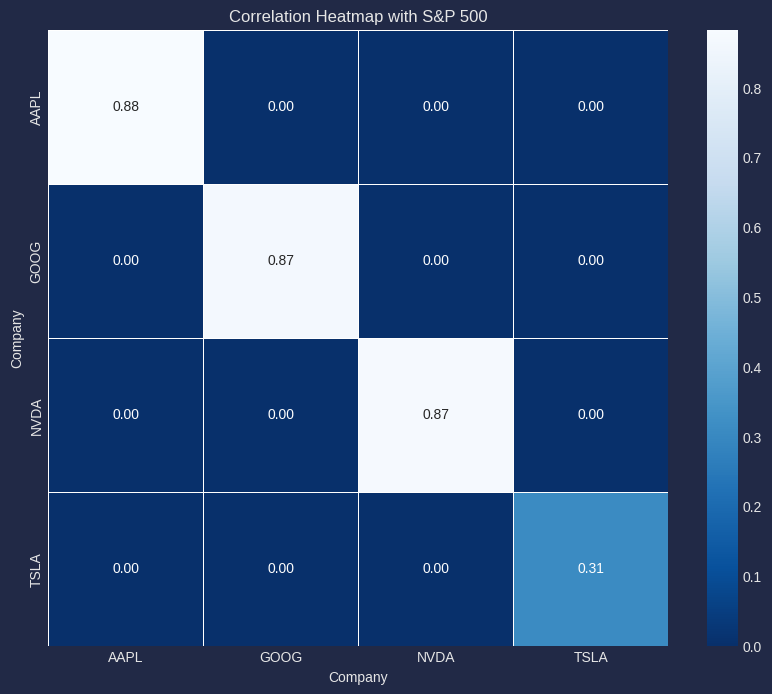

In [17]:
correlation_df = pd.DataFrame(correlation_data)
heatmap_data = correlation_df.pivot_table(index='Company', columns='Company', values='Correlation', fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='Blues_r', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap with S&P 500')
plt.show()

# Performance Metrics

**📑 Sharpe Ratio:**
>The Sharpe ratio is a measure that assesses the relationship between an investment's return and its risk. Introduced by economist William F. Sharpe, it compares the excess return of an investment to a benchmark with the volatility of those returns. A higher Sharpe ratio indicates better risk-adjusted performance. It helps investors understand whether historical excess returns were achieved with higher or lower volatility. The ratio's formula involves dividing the difference between returns and a benchmark by the standard deviation of returns. It's widely used for gauging risk-adjusted relative returns.
<p>&nbsp;</p>

Source: [investopedia](https://www.investopedia.com/terms/s/sharperatio.asp)

In [18]:
sharpe_ratios = []
stock_names = []

# Calculate Sharpe Ratio for each company
for i, company in enumerate(company_list, 1):
    company['Daily Returns'] = company['Close'].pct_change()
    sharpe_ratio = np.sqrt(252) * (company['Daily Returns'].mean() / company['Daily Returns'].std())
    print(f"Sharpe Ratio for {stocks_list[i - 1]}: {sharpe_ratio}")
    sharpe_ratios.append(sharpe_ratio)
    stock_names.append(stocks_list[i - 1])

Sharpe Ratio for AAPL: 0.32365992890467343
Sharpe Ratio for GOOG: 0.31098449084435453
Sharpe Ratio for TSLA: -0.07715395973011362
Sharpe Ratio for NVDA: 1.2625942727911226


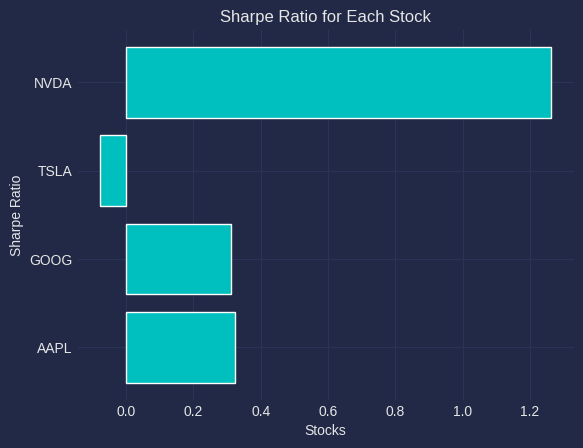

In [19]:
plt.barh(stock_names, sharpe_ratios, color='c')
plt.xlabel('Stocks')
plt.ylabel('Sharpe Ratio')
plt.title('Sharpe Ratio for Each Stock')
plt.show()

* The ratio for TSLA (Tesla) is negative (-0.14), indicating a negative risk-adjusted return. This could imply that the investment has not adequately compensated for the level of risk. In simpler terms, the investment in Tesla may not have been worth the risk taken.

* The ratio for NVDA (NVIDIA) is relatively high (1.16), indicating a positive and better risk-adjusted return than the other stocks mentioned.


 # Data Preparation for Forecasting Stock Price

In [20]:
# create a new data frame with only 'Close column'
apple_data = AAPL.filter(['Close'])
data = apple_data.values

**Normalization**
>Normalization is an important preprocessing step in machine learning, especially for algorithms that are sensitive to the scale of input features. It ensures that all features make an equal contribution to the model training process. Min-Max Scaler and Standard Scaler are two commonly used scalers for normalization.
<ol>
    <li>Min-Max Scaler: This scaler scales the data to a specific range, usually between 0 and 1. It is effective when the data does not have a uniform distribution and is with the potential for outliers.
</li>
    <p>&nbsp;</p>
    <li>Standard Scaler: Scales the data to have a mean of 0 and a standard deviation of 1. It is less sensitive to outliers because it assumes the data has a Normal distribution.
</li>
</ol>

In [22]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [23]:
# Splitting the scaled data into training and testing sets
training_data_len = int(np.ceil(len(scaled_data) * .8))
train_data = scaled_data[0:int(training_data_len), :]

#Split the data into x_train, y_train datasets
x_train, y_train = [], []
for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60:i, 0])
    y_train.append(train_data[i,0])

#convert the x_train and y_train to numppy array and reshape the data
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(341, 60, 1)

# Long Short-Term Memory (LSTM)

<div>
    <p style="line-height:1.7em;">
        Long Short-Term Memory (LSTM) is a specialized type of Recurrent Neural Network (RNN) designed to address the challenge of learning long-term dependencies in sequential data. Unlike traditional RNNs, LSTMs introduce a memory cell which is a container that can hold information for a long time. Three gates control the memory cell: the input gate, the forget gate, and the output gate. These gates control the flow of information, determining what to add, remove, or output from the memory cell. This enables LSTMs to selectively retain important information over extended periods, making them effective for processing and predicting sequential data, Particularly in time series forecasting and natural language processing applications.
        <center><img src="https://media.geeksforgeeks.org/wp-content/uploads/newContent1.png" width="500" height="400"></center>
        <ol>
            <li>
                <b>Forget Gate:</b>
            </li>
            <ul>
                <li>
                    Removes outdated information from the cell state. Takes x_t and h_t-1 as inputs, processes them through weight matrices and bias, and then applies sigmoid activation.<br><p>&nbsp;</p>
                    <center><img src="https://media.geeksforgeeks.org/wp-content/uploads/newContent2.png" width="150" height="50"></center>
                </li>
            </ul>
            <br>
            <li>
                <b>Input Gate:</b>
            </li>
            <ul>
                <li>
                    Adds useful information to the cell state. Uses the sigmoid function to regulate information and filters values using the inputs h_t-1 and x_t. The tanh function is used to generate a vector.<br><p>&nbsp;</p>
                    <center><img src="https://media.geeksforgeeks.org/wp-content/uploads/newContent4.png" width="300" height="200"></center>
                </li>
            </ul>
            <li>
                <b>Output Gate:</b>
            </li>
            <ul>
                <li>
                    The purpose of this gate is to extract useful information from the current cell state for output. Uses the tanh function to generate a vector, the sigmoid function to regulate information, and the h_t-1 and x_t inputs to filter by values.<br><p>&nbsp;</p>
                  <center> <img src="https://media.geeksforgeeks.org/wp-content/uploads/newContent3.png" width="150" height="100"><br></center>
                </li>
            </ul>
        </ol>
    </p>
</div>


>*These gates allow the LSTM to manage and use information for a variety of tasks in processing sequential data. For a detailed reference, visit [geeksforgeeks]('https://www.geeksforgeeks.org/deep-learning-introduction-to-long-short-term-memory/').*

In [ ]:
x_train.shape

In [24]:
# Building the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=25))
model.add(Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 25)                7600      
                                                                 
 dense (Dense)               (None, 1)                 26        
                                                                 
Total params: 38226 (149.32 KB)
Trainable params: 38226 (149.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compiling and training the LSTM model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=20)

Epoch 1/20
341/341 [==============================] - 20s 43ms/step - loss: 0.1522
Epoch 2/20
341/341 [==============================] - 14s 42ms/step - loss: 0.0926
Epoch 3/20
341/341 [==============================] - 14s 42ms/step - loss: 0.0700
Epoch 4/20
341/341 [==============================] - 14s 42ms/step - loss: 0.0565
Epoch 5/20
341/341 [==============================] - 30s 89ms/step - loss: 0.0553
Epoch 6/20
341/341 [==============================] - 19s 57ms/step - loss: 0.0434
Epoch 7/20
341/341 [==============================] - 14s 40ms/step - loss: 0.0405
Epoch 8/20
341/341 [==============================] - 14s 40ms/step - loss: 0.0339
Epoch 9/20
341/341 [==============================] - 14s 40ms/step - loss: 0.0330
Epoch 10/20
341/341 [==============================] - 14s 40ms/step - loss: 0.0331
Epoch 11/20
341/341 [==============================] - 14s 42ms/step - loss: 0.0322
Epoch 12/20
341/341 [==============================] - 15s 42ms/step - loss: 0.0303
E

# Stock Price Prediction and Model Evaluation

In [ ]:
# Preparing test data and making predictions
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = data[training_data_len:,:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i -60:i, 0])

In [ ]:
# convert the data to a numpy array and reshape the data
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Evaluating model performance using Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error: {rmse}')

In [ ]:
# Plotting the predicted stock prices against actual prices
dataset = apple_data.filter(['Close'])
train = dataset[:training_data_len]
test = dataset[training_data_len:]
test['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#show the test and predicted price
test

**Predicted vs Actual:**
>This plot shows how well a regression model performs. If the predictions perfectly match the actual values, the points should align along a straight line with a slope of one. The closer the points cluster around this line, the more accurate the model's predictions are.

In [ ]:
actual_values = y_test
predicted_values = predictions

plt.figure(figsize=(10, 6))

# Scatter plot of predicted vs. actual values
plt.subplot(2, 2, 1)
plt.scatter(predicted_values, actual_values, alpha=0.7)
plt.title('Predicted vs. Actual Values')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

**Residual plot:**
>This plot offering insight into the relationship between observed and predicted values. Residuals distributed randomly around y = 0 indicate a well-captured data structure, whereas patterns or trends indicate model inadequacy. A good model will have residuals dispersed around zero, shown by a red dashed line. This plot is crucial tool in regression analysis.

In [ ]:
# Calculate residuals
residuals = actual_values - predicted_values
plt.figure(figsize=(10, 6))

# Residuals vs. Predicted Values
plt.subplot(2, 2, 2)
plt.scatter(predicted_values, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

In [ ]:
plt.figure(figsize=(10, 6))

# Residuals Histogram
plt.subplot(2, 2, 3)
plt.hist(residuals, bins=20, edgecolor='black')
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Appreciation:

Thank you for joining me on this journey of stock price forecasting. Creating this notebook was a fantastic learning experience, and I hope it gave you some useful insights. My goal is for you to not only learn from this exploration, but also enjoy the process itself. Your feedback is invaluable; if you have any thoughts or suggestions, don't hesitate to share. Your comments are highly appreciated, and if you enjoyed the content, consider giving it an upvote. Thank you!
<p>&nbsp;</p>

🔖 I appreciate the authors of the insightful notebooks I've encountered on Kaggle. Their efforts have really helped me grasp important concepts and discover new and valuable insights.

1. [📊Stock Market Analysis 📈 + Prediction using LSTM ](https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm?kernelSessionId=117825740)

2. [Everything you can do with a time series](https://www.kaggle.com/code/thebrownviking20/everything-you-can-do-with-a-time-series?kernelSessionId=4882227)


3. [[LSTM] S&P500 Stocks Time Series Forecasting](https://www.kaggle.com/code/yassinesfaihi/lstm-s-p500-stocks-time-series-forecasting?kernelSessionId=119474903)

4. [LSTM time series + stock price prediction = FAIL](https://www.kaggle.com/code/carlmcbrideellis/lstm-time-series-stock-price-prediction-fail?kernelSessionId=92140335)


5. [Crypto BitCoin Stock Price Prediction using LSTM](https://www.kaggle.com/code/muhammadali786/crypto-bitcoin-stock-price-prediction-using-lstm?kernelSessionId=141557318)
   